In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

tensor([[16., 14., 13., 19., 24., 14.],
        [22., 14., 14., 21., 12., 17.],
        [18., 23., 20., 11., 15., 13.],
        ...,
        [14., 20., 15., 19., 16., 16.],
        [12., 20., 18., 14., 19., 17.],
        [ 9., 21., 26., 12., 17., 15.]])


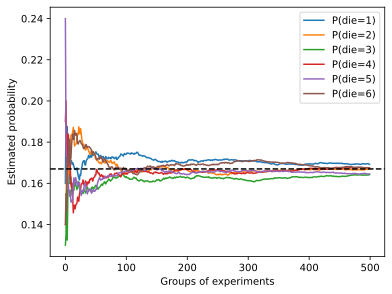

In [23]:
fair_probs = torch.ones([6])/6
# 进行500组实验，每组抽取10个样本
counts = multinomial.Multinomial(10,fair_probs).sample((500,))
print(counts)
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1,keepdim=True)

d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),
                 label=('P(die='+ str(i+1)+')'))

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

##### T.2：给定两个概率为 $P(\mathcal{A})$ 和$P(\mathcal{B})$ 的事件，计算$P(\mathcal{A}\cap \mathcal{B})$ 和 $P(\mathcal{A}\cup \mathcal{B})$的上下限

$0\leq P(\mathcal{A}\cap \mathcal{B})\leq min(P(\mathcal{A}),P(\mathcal{B}))$

$P(\mathcal{A}\cup \mathcal{B}) = P(\mathcal{A})+P(\mathcal{B})-P(\mathcal{A}\cap \mathcal{B})$
$max(P(\mathcal{A}),P(\mathcal{B}))\leq P(\mathcal{A}\cup \mathcal{B})\leq P(\mathcal{A})+P(\mathcal{B})$


##### T.3：简化$P(\mathcal{A},\mathcal{B},\mathcal{C})$ 其中，B只依赖于A，C只依赖于B

由已知：
$P(\mathcal{B}|\mathcal{A,C}) = P(\mathcal{B}|\mathcal{A})$
$P(\mathcal{C}|\mathcal{A,B}) = P(\mathcal{C}|\mathcal{B})$

得$P(\mathcal{A},\mathcal{B},\mathcal{C}) = P(\mathcal{A})P(\mathcal{B}|\mathcal{A})P(\mathcal{C}|\mathcal{B})$